<h1> Step 1: Load the data </h1>


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory, DelphesSchema
import numpy as np
import uproot
import ROOT
import awkward as ak
import funcs


#Signal
signal_filepath = "data/temp_1/run_01.root"
signalfile = uproot.open(signal_filepath)
tree_name= "Delphes"
signaltree = signalfile[tree_name]

signalevents = NanoEventsFactory.from_root(signaltree, schemaclass=DelphesSchema).events()


#Background






#----
#will store data to be used in final "cut chart"
num_cuts = 5
SM_events = [1000,700,200]
NP_events = [500,400,300]
Significance = [1,2.4,5]
    #all this is temp for now




<h1> Step 2: Extract Data </h1>


In [27]:
#Signal Data

s_event =signalevents['Event']
weight = signalevents['Weight']
met = signalevents['MissingET']
jet = signalevents['Jet']

weight_weight = weight.Weight.compute()
met_met = met.MET.compute()
met_phi = met.Phi.compute()
jet_pt = jet.PT.compute()
jet_eta = jet.Eta.compute()
jet_phi = jet.Phi.compute()
#need invariable mass

signal_data = {
    "Weight" : weight_weight,
    "Met_met" : met_met,
    "Met_phi" : met_phi,
    "Jet_pt" : jet_pt,
    "Jet_eta" : jet_eta,
    "Jet_phi" : jet_phi
}



#Background Data


<h1> Step 3: Plot Everything </h1>

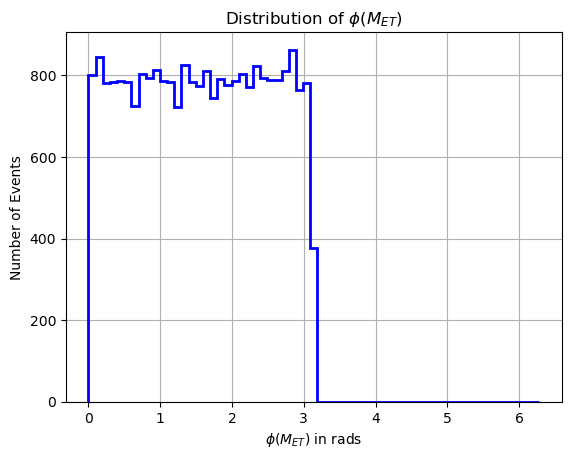

In [24]:
binning = {
    "PT": {"range": (20, 300), "bins": 14},  # (300 - 20) / 20 = 14 bins
    "Eta*Eta": {"range": (-25, 25), "bins": 500},  # (25 - (-25)) / 0.1 = 500 bins
    "Delta_Eta": {"range": (0, 10), "bins": 100},  # (10 - 0) / 0.1 = 100 bins
    "Transverse": {"range": (500, 2000), "bins": 75},  # (2000 - 500) / 20 = 75 bins
    "Eta": {"range": (-5, 5), "bins": 100},  # (5 - (-5)) / 0.1 = 100 bins
    "Phi": {"range": (0, 2 * np.pi), "bins": 63}  # (2 * pi - 0) / 0.1 = 63 bins
}



#S_Phi_Met
plt.hist(signal_data["Met_phi"], bins=binning['Phi']['bins'], range=binning['Phi']['range'], histtype='step', linewidth=2, color='b')
plt.xlabel('$\phi$($M_{ET}$) in rads')
plt.ylabel('Number of Events')
plt.title('Distribution of $\phi$($M_{ET})$')
plt.grid(True)
plt.show()


<h1> Step 3: Iteratively Plot, then Cut <h1>

<b> $\eta$($j_0$) *  $\eta$($j_1$) </b>

<b> abs($\Delta$($j_0$,$j_1$)) </b>

<b>Pt($j_0$) </b>

<b>Pt($j_1$)</b>

<b> $M_{ET}$, <b>

<h1>Step 5: Compile full Cut Chart </h1>

In [ ]:

column_width = 12  

# Create the grid header
header_row = f"{'Cut #':^{column_width}} | {'SM Events':^{column_width}} | {'NP Events':^{column_width}} | {'Significance':^{column_width}}"
print(header_row)

# Print a separator line
print("-" * (len(header_row) + 1))

#Initial Conditions
init_data = f"{'    Init':{column_width}} | {SM_events[0]:^{column_width}} | {NP_events[0]:^{column_width}} | {Significance[0]:^{column_width}.2f}"  # 
print(init_data)

# Iterate through data and format each row
for i in range(1, num_cuts):  # Use range(1, num_cuts+1) for 1 to num_cuts (inclusive)
    row_data = f"{i:{column_width}} | {SM_events[i]:^{column_width}} | {NP_events[i]:^{column_width}} | {Significance[i]:^{column_width}.2f}" 
    print(row_data)


